<a href="https://colab.research.google.com/github/SnehaGhosh10/tesla25/blob/main/handwriting_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.utils as tku

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.17.0'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip= True)


In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/mnist/trainingSet',target_size=(28,28),batch_size=32,class_mode='binary')

Found 484 images belonging to 1 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/mnist/testSet',target_size=(64,64),batch_size=32,class_mode='categorical')

Found 84 images belonging to 1 classes.


In [ ]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784')
print (mnist)
print (mnist['data'])

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ..

In [ ]:
x,y = mnist['data'],mnist['target']
print (x)
print (y)
x.shape
y.shape

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel7

(70000,)

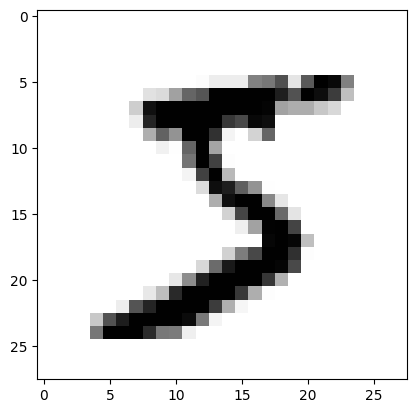

0


In [ ]:
demo_digit =[6]
demo_digit=np.array(demo_digit)
demo_digit=x.iloc[0].values.reshape(28,28)
plt.imshow(demo_digit,cmap=cm.binary, interpolation='nearest')
plt.show()
print(y[1])


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Dense(64,activation='relu',input_dim=784))
cnn.add(tf.keras.layers.Dense(16,activation='relu'))
cnn.add(tf.keras.layers.Dense(10,activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x_train,tku.to_categorical(y_train), epochs=5, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1574 - loss: 4.2232
Epoch 2/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1973 - loss: 2.0810
Epoch 3/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2402 - loss: 1.9787
Epoch 4/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4031 - loss: 1.5573
Epoch 5/5
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7182 - loss: 0.8604


In [ ]:
cnn.evaluate(x_test, tku.to_categorical(y_test))

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8740 - loss: 0.5285


[0.544301450252533, 0.8751428723335266]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[7.14112616e-21 7.63323627e-09 1.79052568e-05 8.41355260e-24
  9.35882628e-01 2.29592192e-23 1.20420965e-11 7.20270021e-09
  2.46888606e-14 6.40995204e-02]]
Predicted digit: 4


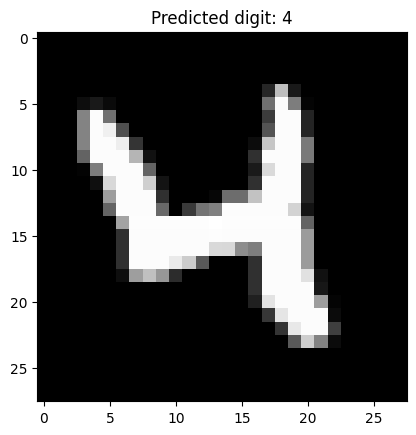

In [ ]:
test_image = x.iloc[20]
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
print(result)
predicted_digit = np.argmax(result)
print("Predicted digit:", predicted_digit)
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted digit: {predicted_digit}")
plt.show()